
<h1><center>Data Analytics</h1>
<h2><center>Homework 2</h2>
<h3><center>Name: 李權桓   &emsp;   ID:10546004</h3>

In [2]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
from matplotlib import image
import matplotlib.pyplot as plt
from scipy import stats
import os
import re
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


In [3]:
# get current working directory
cwd= os.getcwd()

# add the read directory to the path
rd = os.path.join(cwd)
zip_file = ZipFile('ORL Faces.zip')
dfs = {png_file.filename: image.imread(zip_file.open(png_file.filename))
       for png_file in zip_file.infolist()
       if png_file.filename.endswith('.png')}
png_df = pd.DataFrame([dfs])
png_df.columns

Index(['ORL Faces/10_1.png', 'ORL Faces/10_10.png', 'ORL Faces/10_2.png',
       'ORL Faces/10_3.png', 'ORL Faces/10_4.png', 'ORL Faces/10_5.png',
       'ORL Faces/10_6.png', 'ORL Faces/10_7.png', 'ORL Faces/10_8.png',
       'ORL Faces/10_9.png',
       ...
       'ORL Faces/9_1.png', 'ORL Faces/9_10.png', 'ORL Faces/9_2.png',
       'ORL Faces/9_3.png', 'ORL Faces/9_4.png', 'ORL Faces/9_5.png',
       'ORL Faces/9_6.png', 'ORL Faces/9_7.png', 'ORL Faces/9_8.png',
       'ORL Faces/9_9.png'],
      dtype='object', length=400)

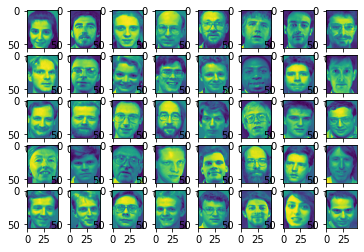

In [5]:
col_name = list(png_df.columns)
fig, ax = plt.subplots(5, 8)
k = 1

for i in col_name:
    #only show the last is _1.png
    match = re.search(r'\w*\s*\w*\/\d*\_1.png',i) 
    if match:
        # print(match.group(), k)
        plt.subplot(5,8,k)
        plt.imshow(png_df[i][0])
        k = k +1

In [6]:
# define gender by hand, each value for 10 pictures
genders = [0,1,1,1,1,1,1,1,
           1,1,0,1,1,1,1,1,
           1,1,1,1,1,1,1,1,
           0,1,1,1,1,1,1,1,
           1,1,1,1,1,1,0,1]
dic = {}          
k = 0
# insert all gender to new row
for i in col_name:    
    match = re.search(r'\w*\s*\w*\/\d*\_1.png',i) 
    if match:
        #print(match.group(), k)
        k = k +1
    dic[i]=[genders[k-1]]
# add new row for png_df
#dic
#pd.DataFrame(dic)

df2 = pd.concat([png_df,pd.DataFrame(dic)]).reset_index(drop=True)

In [7]:

sample_df = df2.rename(index={0:'data',1:'gender'}).T

print('See how data looks like: \n', sample_df)
print('\n Check the dimension for each picture: ' , np.matrix(sample_df['data'][0]).shape)


See how data looks like: 
                                                                   data gender
ORL Faces/10_1.png   [[0.5372549, 0.5294118, 0.5294118, 0.5294118, ...      0
ORL Faces/10_10.png  [[0.5137255, 0.5137255, 0.5137255, 0.50980395,...      0
ORL Faces/10_2.png   [[0.53333336, 0.53333336, 0.53333336, 0.533333...      0
ORL Faces/10_3.png   [[0.53333336, 0.5294118, 0.5372549, 0.5137255,...      0
ORL Faces/10_4.png   [[0.49019608, 0.47843137, 0.5176471, 0.5294118...      0
...                                                                ...    ...
ORL Faces/9_5.png    [[0.42745098, 0.43137255, 0.44313726, 0.435294...      1
ORL Faces/9_6.png    [[0.44313726, 0.4392157, 0.44705883, 0.4470588...      1
ORL Faces/9_7.png    [[0.43529412, 0.44313726, 0.4392157, 0.4470588...      1
ORL Faces/9_8.png    [[0.4392157, 0.4392157, 0.43529412, 0.44313726...      1
ORL Faces/9_9.png    [[0.43529412, 0.4392157, 0.4392157, 0.44313726...      1

[400 rows x 2 columns]

 Check the d

In [9]:
# flatten all pics data 
data_mat = np.array(np.ndarray.flatten(sample_df['data'][0]))
for i in range(1, len(sample_df)):
    data_mat = np.concatenate((data_mat,
         np.array(np.ndarray.flatten(sample_df['data'][i]))))
data_mat = data_mat.reshape(400,2576)
data_mat.shape

(400, 2576)

In [25]:
# using sklearn package

model = LinearRegression().fit(data_mat,sample_df['gender'])
r_sq = model.score(data_mat, sample_df['gender'])
print('R-square: ', r_sq)
print('beta_0 :', model.intercept_)
print('All other betas: ', model.coef_)

R-square:  0.9999999999704126
beta_0 : 0.95480764
All other betas:  [ 0.01702205  0.02047496  0.01806046 ... -0.00917642 -0.05203912
 -0.04648183]


In [19]:
# use statsmodel Ordinary least squred model package

# Fit a regression line to the data, and display the model results
X = pd.DataFrame(data_mat,index=sample_df.index)       # predictor variable(s)
#X = pd.DataFrame([range(400)])         # predictor variable(s)
y = list(sample_df['gender'])         # response variable
X = sm.add_constant(X)       # add the intercept term to the model

# Note the difference in argument order
model = sm.OLS(y, X).fit()   # sm.OLS(response variable, predictor(s))
fitted = model.predict(X)    # finds the fitted values (y_hat)

# Print out the statistics
print(model.summary())
# two linear models results are different. 

/usr/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1751: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1751: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1673: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 02 Mar 2022   Prob (F-statistic):                nan
Time:                        23:20:55   Log-Likelihood:                 12299.
No. Observations:                 400   AIC:                        -2.380e+04
Df Residuals:                       0   BIC:                        -2.220e+04
Df Model:                         399                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2179        inf          0        n

In [133]:

print(np.matrix(np.ndarray.flatten(sample_df['data'][0])).shape)
data_mat = np.array(np.ndarray.flatten(sample_df['data'][0]))
for i in range(1, len(sample_df)):
    data_mat = np.concatenate((data_mat,
         np.array(np.ndarray.flatten(sample_df['data'][i]))))
data_mat = data_mat.reshape(400,2576)

(1, 2576)


In [104]:
len(sample_df)
np.concatenate([(np.array(np.ndarray.flatten(sample_df['data'][1])),
         np.array(np.ndarray.flatten(sample_df['data'][1])))])

array([[0.5137255 , 0.5137255 , 0.5137255 , ..., 0.09019608, 0.09411765,
        0.10588235],
       [0.5137255 , 0.5137255 , 0.5137255 , ..., 0.09019608, 0.09411765,
        0.10588235]], dtype=float32)

In [134]:

np.concatenate(([np.array([1,2,3]),np.array([1,2,3])]))

print(np.array(np.ndarray.flatten(sample_df['data'][0])))
data_mat.shape


[0.         0.         0.         ... 0.07058824 0.08235294 0.12941177]


(400, 2576)